# Artificial Intelligence Final Project

This is a project that aims to classify person that wearing hat and glasses.

## Get the Dataset from Kaggle

In [ ]:
# Kaggle API
!touch kaggle.json
!echo "{\"username\":\"oracl4\",\"key\":\"b8c568e9b4364c7a9428bd222cf1ae7e\"}" > kaggle.json

# Move the credentials so we can use Kaggle API
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Change Permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the Dataset
!kaggle datasets download -d jessicali9530/celeba-dataset
!mkdir dataset
!mkdir dataset/raw
!mv celeba-dataset.zip dataset/raw/

100% 1.33G/1.33G [00:12<00:00, 89.9MB/s]



In [ ]:
# Extract the Dataset
!unzip dataset/raw/celeba-dataset.zip -d dataset/raw/

Streaming output truncated to the last 5000 lines.
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: dataset/raw/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: 

## Process the Dataset

In [ ]:
import pandas as pd

face_attributes = pd.read_csv('/content/dataset/raw/list_attr_celeba.csv')

In [ ]:
face_attributes

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,-1,1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1,-1,1


In [ ]:
# Change this two any class that we want to classify
Class1_Name = "Wearing_Hat"
Class2_Name = "Eyeglasses"

image_df = face_attributes[['image_id', Class1_Name, Class2_Name]]

In [ ]:
image_df

,image_id,Wearing_Hat,Eyeglasses
0,000001.jpg,-1,-1
1,000002.jpg,-1,-1
2,000003.jpg,-1,-1
3,000004.jpg,-1,-1
4,000005.jpg,-1,-1
...,...,...,...
202594,202595.jpg,-1,-1
202595,202596.jpg,-1,-1
202596,202597.jpg,-1,1
202597,202598.jpg,-1,-1


In [ ]:
# Drop any image that not contains hat or glasses
image_df = image_df[(image_df[Class1_Name] > 0) | (image_df[Class2_Name] > 0)]

# Drop any image that contains hat and glasses in the same face (create distinct dataset)
image_df = image_df[(image_df[Class1_Name] != 1) | (image_df[Class2_Name] != 1)]

In [ ]:
image_df

,image_id,Wearing_Hat,Eyeglasses
36,000037.jpg,1,-1
52,000053.jpg,-1,1
67,000068.jpg,1,-1
73,000074.jpg,1,-1
92,000093.jpg,-1,1
...,...,...,...
202567,202568.jpg,-1,1
202587,202588.jpg,-1,1
202588,202589.jpg,1,-1
202589,202590.jpg,-1,1


In [ ]:
# Get df of image contains hat
Class1_DF = image_df[(image_df[Class1_Name] == 1)]

# Get df of image contains glasses
Class2_DF = image_df[(image_df[Class2_Name] == 1)]

In [ ]:
print(Class1_DF.head)
print(Class2_DF.head)

<bound method NDFrame.head of           image_id  Wearing_Hat  Eyeglasses
36      000037.jpg            1          -1
67      000068.jpg            1          -1
73      000074.jpg            1          -1
94      000095.jpg            1          -1
136     000137.jpg            1          -1
...            ...          ...         ...
202463  202464.jpg            1          -1
202469  202470.jpg            1          -1
202480  202481.jpg            1          -1
202502  202503.jpg            1          -1
202588  202589.jpg            1          -1

[8417 rows x 3 columns]>
<bound method NDFrame.head of           image_id  Wearing_Hat  Eyeglasses
52      000053.jpg           -1           1
92      000093.jpg           -1           1
118     000119.jpg           -1           1
143     000144.jpg           -1           1
151     000152.jpg           -1           1
...            ...          ...         ...
202540  202541.jpg           -1           1
202567  202568.jpg           -1   

In [ ]:
# Randomly Select 8000 data from the list
Class1_DF = Class1_DF.sample(n = 8000)
Class2_DF = Class2_DF.sample(n = 8000)

In [ ]:
# Convert image dataframe to list
Class1_List = Class1_DF['image_id'].values.tolist()
Class2_List = Class2_DF['image_id'].values.tolist()

### Copy the image to final directory

In [ ]:
!mkdir dataset/final
!mkdir dataset/final/Class1
!mkdir dataset/final/Class2

In [ ]:
import os
from tqdm import tqdm
from shutil import copyfile

# Path
inp_Path = '/content/dataset/raw/img_align_celeba/img_align_celeba/'
out_Path = '/content/dataset/final/'

# Process the image > copy to the final folder
# Class1
print("Copying " + Class1_Name + " Images")
for image in tqdm(Class1_List):
    readPath = os.path.join(inp_Path, image)
    writePath = os.path.join(out_Path, "Class1", image)
    copyfile(readPath, writePath)
    
# Class2
print("Copying " + Class2_Name + " Images")
for image in tqdm(Class2_List):
    readPath = os.path.join(inp_Path, image)
    writePath = os.path.join(out_Path, "Class2", image)
    copyfile(readPath, writePath)

Copying Wearing_Hat Images


100%|██████████| 8000/8000 [00:00<00:00, 13181.82it/s]


Copying Eyeglasses Images


100%|██████████| 8000/8000 [00:00<00:00, 9904.06it/s]


## Creating Tensorflow Dataset

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
# Dataset Parameter
batch_size = 32
img_height = 224
img_width = 224

data_dir = "/content/dataset/final"

In [ ]:
# Create training tensorflow dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1447,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Create validation tensorflow dataset
val_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1447,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Change the class names
train_dataset.class_names = [Class1_Name, Class2_Name]
val_dataset.class_names = [Class1_Name, Class2_Name]

Found 16000 files belonging to 2 classes.
Using 12800 files for training.
Found 16000 files belonging to 2 classes.
Using 3200 files for validation.


In [ ]:
val_batches = tf.data.experimental.cardinality(val_dataset)
test_dataset = val_dataset.take(val_batches // 5)
val_dataset = val_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 80
Number of test batches: 20


In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Wearing_Hat', 'Eyeglasses']


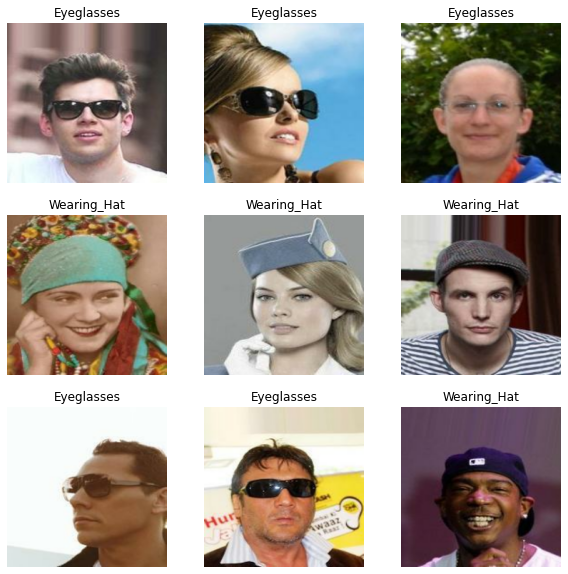

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

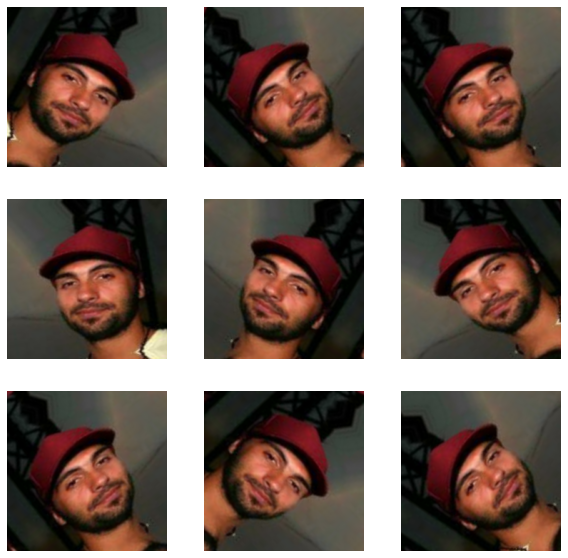

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
# val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# Model Creation - Transfer Learning

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = (img_height, img_width) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

In [ ]:
epochs = 10

loss0, accuracy0 = model.evaluate(val_dataset)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

80/80 [==============================] - 6s 47ms/step - loss: 0.9442 - accuracy: 0.3012
initial loss: 0.94
initial accuracy: 0.30


In [ ]:
# Train the model
history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset)

Epoch 1/10
400/400 [==============================] - 28s 63ms/step - loss: 0.5426 - accuracy: 0.6972 - val_loss: 0.2808 - val_accuracy: 0.9418
Epoch 2/10
400/400 [==============================] - 26s 64ms/step - loss: 0.2714 - accuracy: 0.8991 - val_loss: 0.1639 - val_accuracy: 0.9684
Epoch 3/10
400/400 [==============================] - 26s 63ms/step - loss: 0.2068 - accuracy: 0.9259 - val_loss: 0.1228 - val_accuracy: 0.9699
Epoch 4/10
400/400 [==============================] - 26s 64ms/step - loss: 0.1751 - accuracy: 0.9377 - val_loss: 0.1039 - val_accuracy: 0.9715
Epoch 5/10
400/400 [==============================] - 26s 63ms/step - loss: 0.1517 - accuracy: 0.9477 - val_loss: 0.0925 - val_accuracy: 0.9730
Epoch 6/10
400/400 [==============================] - 26s 63ms/step - loss: 0.1459 - accuracy: 0.9455 - val_loss: 0.0875 - val_accuracy: 0.9746
Epoch 7/10
400/400 [==============================] - 25s 63ms/step - loss: 0.1343 - accuracy: 0.9497 - val_loss: 0.0831 - val_accuracy:

In [ ]:
model.save('MobileNetV2_FineTuned.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


# Evaluation

In [ ]:
# Evaluate Accuracy
print("Evaluation")
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

Evaluation
20/20 [==============================] - 1s 53ms/step - loss: 0.0627 - accuracy: 0.9859
Test accuracy : 0.9859374761581421


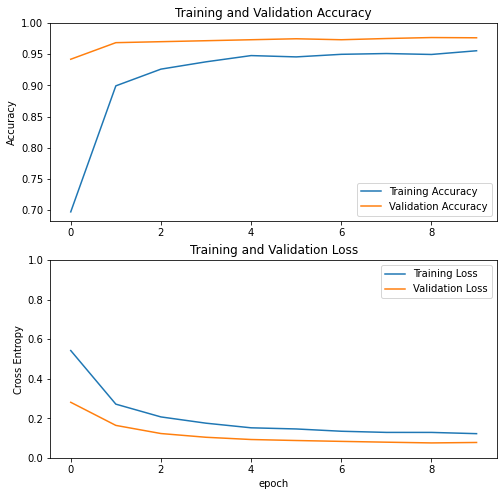

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Predictions:
 [1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1]
Labels:
 [1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0]


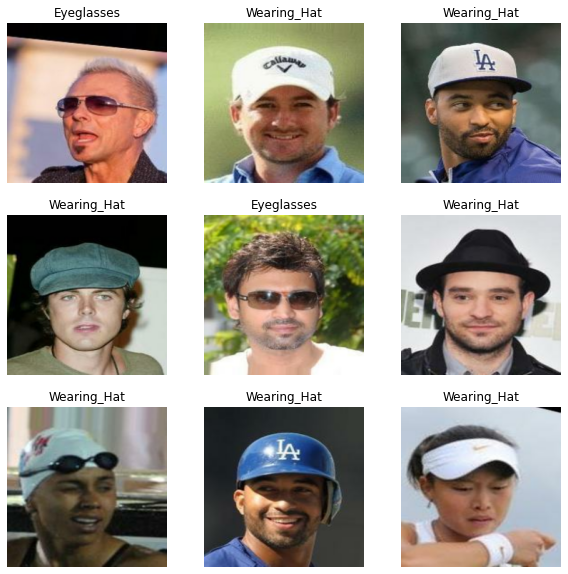

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [ ]:
label = []
predictions = []

for x, y in test_dataset:
  x = model.predict(x)
  x = tf.nn.relu(x)
  x = tf.where(x < 0.5, 0, 1)
  x = np.squeeze(x)
  label = np.concatenate((label, y))
  predictions = np.concatenate((predictions, x))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix   

print('\nClasification report:\n', classification_report(label, predictions))
print('\nConfussion matrix:\n', confusion_matrix(label, predictions))

cfm = confusion_matrix(label, predictions)


Clasification report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       326
         1.0       0.97      0.98      0.98       314

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640


Confussion matrix:
 [[318   8]
 [  6 308]]


In [ ]:
tf.math.confusion_matrix(
    label, predictions, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[318,   8],
       [  6, 308]], dtype=int32)>

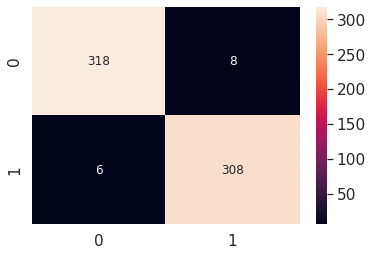

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cfm, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, fmt='g', annot_kws={"size": 12}) # font size

plt.show()

# Demo Implementation

In [ ]:
# frame.to_ndarray(format="bgr24")
from tensorflow.keras.preprocessing import image
# img_path = "/content/glasses.jpg"
img_path = "/content/hat.jpg"
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

FileNotFoundError: ignored

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

NameError: ignored

In [ ]:
# img_preprocessed = preprocess_input(img_batch)
predictions = model.predict(img_batch)
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)
predictions = np.squeeze(predictions)
print(predictions)

NameError: ignored

# K-Fold Cross Validation Training



In [ ]:
base_learning_rate = 0.0001

kf_acc = []

for kfi in range(10):
  
  print("New Shard")
  train_dataset_train_list = [train_dataset.shard(num_shards=10, index=isi) for isi in range(10) if isi != kfi]
  train_dataset_train = train_dataset_train_list[0]
  train_dataset_val = val_dataset.shard(num_shards=10, index=kfi)

  for isi in train_dataset_train_list[1:]:
    train_dataset_train.concatenate(isi)

  # Create model from beginning
  base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                 include_top=False,
                                                 weights='imagenet')
  
  base_model.trainable = False

  image_batch, label_batch = next(iter(train_dataset_train))
  feature_batch = base_model(image_batch)

  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  feature_batch_average = global_average_layer(feature_batch)

  prediction_layer = tf.keras.layers.Dense(1)
  prediction_batch = prediction_layer(feature_batch_average)

  inputs = tf.keras.Input(shape=(img_height, img_width, 3))
  x = data_augmentation(inputs)
  x = preprocess_input(x)
  x = base_model(x, training=False)
  x = global_average_layer(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  outputs = prediction_layer(x)

  model = tf.keras.Model(inputs, outputs)

  model.summary()

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

  # Train the model
  history = model.fit(train_dataset_train,
                      epochs=epochs,
                      validation_data=train_dataset_val)

  # Evaluate Accuracy
  print("Evaluation | Fold ", kfi)
  loss, accuracy = model.evaluate(train_dataset_val)
  print('Test accuracy :', accuracy)

  kf_acc.append(accuracy)

New Shard
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                 

In [ ]:
# Calcualate average accuracy
print(kf_acc)

[0.9375, 0.9375, 0.921875, 0.9375, 0.953125, 0.9609375, 0.92578125, 0.953125, 0.91015625, 0.94921875]
